In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import joblib


1.Loading and exploring the dataset

In [7]:
df = pd.read_csv('/content/drive/MyDrive/concept and technology of AI/global_urbanization_climate_metrics.csv')


2.Data cleaning and preprocessing

In [8]:
# Data Preprocessing
# Handling missing values
df.dropna(inplace=True)

In [12]:


# Ensure column names have no extra spaces
df.columns = df.columns.str.strip()


In [15]:
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['country', 'country_code', 'year', 'total_pop', 'pop_dens_sq_km', 'gdp',
       'urban_pop_perc', 'rural_pop_perc', 'elect_access_pop',
       'internet_use_pop', 'basic_sanitation_pop', 'safe_sanitation_pop',
       'energy_kg_oil_eq_cap', 'ren_energy_cons_perc',
       'clean_fuel_tech_cook_pop', 'co2_emiss_excl_lulucf'],
      dtype='object')


In [32]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['country', 'country_code']


In [33]:
# Convert categorical columns using one-hot encoding
X = pd.get_dummies(X, drop_first=True)  # This converts categories into numeric form

# Exploratory Data Analysis (EDA)

Dataset Summary:
              year     total_pop  pop_dens_sq_km           gdp  \
count  2176.000000  2.176000e+03     2176.000000  2.176000e+03   
mean   2007.124081  4.823386e+08      163.243707  3.119051e+12   
std       4.366671  1.104107e+09      582.203568  8.565166e+12   
min    2000.000000  9.608500e+04        1.543388  1.040859e+08   
25%    2003.000000  7.832326e+06       34.847466  3.443500e+10   
50%    2007.000000  3.690369e+07       69.135857  2.516844e+11   
75%    2011.000000  3.733353e+08      115.263528  1.493468e+12   
max    2015.000000  7.353911e+09     7714.702398  8.002034e+13   

       urban_pop_perc  rural_pop_perc  elect_access_pop  internet_use_pop  \
count     2176.000000     2176.000000       2176.000000       2176.000000   
mean        59.589410       40.410590         83.469588         30.012332   
std         20.874626       20.874626         26.052199         27.877292   
min         13.397000        0.000000          3.900000          0.000289   
25%

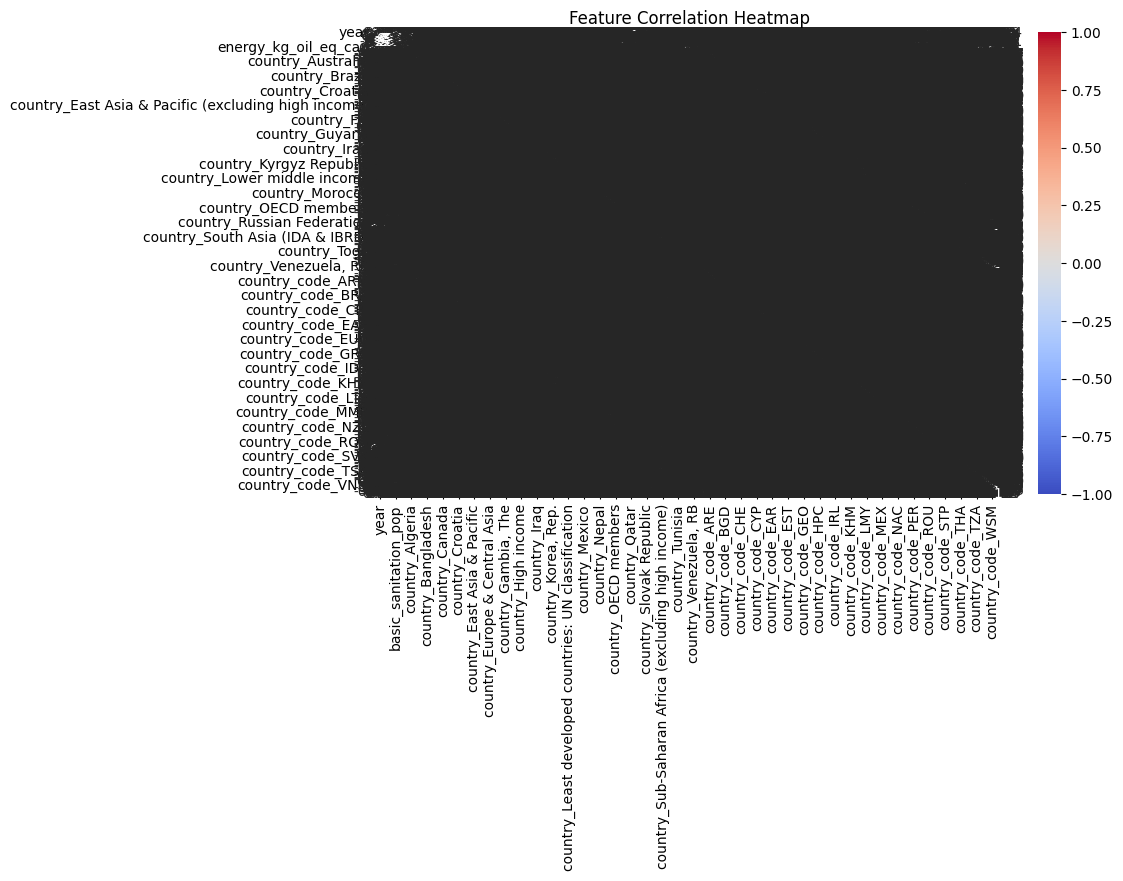

In [41]:
print("Dataset Summary:")
print(df.describe())

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
target_variable = 'gdp'  # Example, replace with the correct name


In [20]:
# Verify before splitting features and target
if target_variable in df.columns:
    X = df.drop(columns=[target_variable])
    y = df[target_variable]
else:
    raise KeyError(f"Error: '{target_variable}' not found in dataset columns.")

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(df.dtypes)  # This will show object (string) columns that need encoding.


country                      object
country_code                 object
year                          int64
total_pop                   float64
pop_dens_sq_km              float64
gdp                         float64
urban_pop_perc              float64
rural_pop_perc              float64
elect_access_pop            float64
internet_use_pop            float64
basic_sanitation_pop        float64
safe_sanitation_pop         float64
energy_kg_oil_eq_cap        float64
ren_energy_cons_perc        float64
clean_fuel_tech_cook_pop    float64
co2_emiss_excl_lulucf       float64
dtype: object


In [28]:
print(df.columns)


Index(['year', 'total_pop', 'pop_dens_sq_km', 'gdp', 'urban_pop_perc',
       'rural_pop_perc', 'elect_access_pop', 'internet_use_pop',
       'basic_sanitation_pop', 'safe_sanitation_pop',
       ...
       'country_code_UMC', 'country_code_USA', 'country_code_UZB',
       'country_code_VEN', 'country_code_VNM', 'country_code_WLD',
       'country_code_WSM', 'country_code_YEM', 'country_code_ZAF',
       'country_code_ZWE'],
      dtype='object', length=316)


 To ensure numeric target

In [29]:
df[target_variable] = pd.to_numeric(df[target_variable], errors='coerce')
df.dropna(subset=[target_variable], inplace=True)


3.Feature scaling

In [35]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4.Training Linear, Ridge, and Lasso regression models

In [36]:
# Model Building
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}
    print(f"{name}: MSE = {mse:.4f}, R2 Score = {r2:.4f}")


Linear Regression: MSE = 2584978883182139031945216.0000, R2 Score = 0.9639
Ridge Regression: MSE = 2607384952444103518322688.0000, R2 Score = 0.9636
Lasso Regression: MSE = 2575550818525563093778432.0000, R2 Score = 0.9641


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.839e+27, tolerance: 1.283e+25
  model = cd_fast.enet_coordinate_descent(


5.Hyperparameter tuning for Ridge Regression

In [37]:
# Hyperparameter Optimization for Ridge Regression
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)
best_ridge = ridge_grid.best_estimator_
print("Best Ridge Regression parameters:", ridge_grid.best_params_)


Best Ridge Regression parameters: {'alpha': 0.1}


In [38]:
# Feature Selection using Coefficients
feature_importance = pd.Series(np.abs(best_ridge.coef_), index=X.columns).sort_values(ascending=False)
selected_features = feature_importance[:5].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['total_pop', 'co2_emiss_excl_lulucf', 'country_code_IBT', 'country_IDA & IBRD total', 'country_World']


6.Saving the best model

In [39]:
joblib.dump(best_ridge, 'best_ridge_model.pkl')
print("Best model saved as best_ridge_model.pkl")

Best model saved as best_ridge_model.pkl


7.Making predictions based on user input

In [40]:
# Predictions based on user input
def predict_new_data(new_data):
    new_data_scaled = scaler.transform([new_data])
    return best_ridge.predict(new_data_scaled)

# Example Usage:
# new_sample = [value1, value2, ..., valueN]  # Replace with actual feature values
# print("Predicted value:", predict_new_data(new_sample))

In [43]:
# Conclusion
print("Final Model Performance:")
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.4f}, R2 Score = {metrics['R2 Score']:.4f}")

print("Impact of Feature Selection and Hyperparameter Tuning:")
print("Feature selection reduced the number of input variables to:", selected_features)
print("Hyperparameter tuning improved Ridge and Lasso models.")

print("Insights and Future Directions:")
print("Further improvements can be made by exploring non-linear models such as Random Forest or Neural Networks.")


Final Model Performance:
Linear Regression: MSE = 2584978883182139031945216.0000, R2 Score = 0.9639
Ridge Regression: MSE = 2607384952444103518322688.0000, R2 Score = 0.9636
Lasso Regression: MSE = 2575550818525563093778432.0000, R2 Score = 0.9641
Impact of Feature Selection and Hyperparameter Tuning:
Feature selection reduced the number of input variables to: ['total_pop', 'co2_emiss_excl_lulucf', 'country_code_IBT', 'country_IDA & IBRD total', 'country_World']
Hyperparameter tuning improved Ridge and Lasso models.
Insights and Future Directions:
Further improvements can be made by exploring non-linear models such as Random Forest or Neural Networks.
